<a href="https://colab.research.google.com/github/dhermawan215/mit-pyhton/blob/main/identifikasi_situs_judi_url_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import re

In [8]:
from google.colab import files
uploaded = files.upload()

# Read the dataset

dataSetAwal = pd.read_excel('domain-gambling-site.xlsx', sheet_name=0)

Saving domain-gambling-site.xlsx to domain-gambling-site (1).xlsx


In [45]:
# 2. Melihat data awal
print("Preview Data:")
print(dataSetAwal.head())


Preview Data:
   No                        domain   TLD
0   1  https://totolotremacau12.com  .com
1   2        https://harta138jp.com  .com
2   3        https://mole4dboss.com  .com
3   4         https://radenhoki.pro  .pro
4   5           https://pompa77.mom  .mom


In [46]:
import os

In [51]:
# Asumsikan kolom 'domain' menyimpan nama domain
if 'domain' not in dataSetAwal.columns:
    raise ValueError("Kolom 'domain' tidak ditemukan. Periksa file Anda.")

# 3. Ekstraksi fitur dari domain
def extract_features(domain):
    # Panjang domain
    domain_length = len(domain)

    # Jumlah angka dalam domain
    digit_count = sum(c.isdigit() for c in domain)

    # Jumlah tanda hubung dalam domain
    hyphen_count = domain.count('-')

    # Deteksi kata kunci perjudian
    gambling_keywords = re.compile(r"(toto|jakpot|nagadewa|slot|gacor|gambling|win|bonus|maxwin|zeus|win|88|77|hoki|harta|bos|siu|bet|138|69|buaya|bandar|raja|magic|togel)", re.IGNORECASE)
    gambling_match = bool(gambling_keywords.search(domain))

    # TLD (Top-Level Domain)
    tld = domain.split('.')[-1] if '.' in domain else "unknown"

    return {
        "domain_length": domain_length,
        "digit_count": digit_count,
        "hyphen_count": hyphen_count,
        "gambling_match": gambling_match,
        "tld": tld
    }

# Terapkan fungsi ke setiap domain
features = dataSetAwal['domain'].apply(extract_features)
features_df = pd.DataFrame(features.tolist())

# Gabungkan fitur baru ke dalam dataframe asli
data = pd.concat([dataSetAwal, features_df], axis=1)


In [52]:
output_path = '/mnt/data/processed_domains.xlsx'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(output_path), exist_ok=True)

data.to_excel(output_path, index=False)

print(f"Hasil analisis disimpan di: {output_path}")

Hasil analisis disimpan di: /mnt/data/processed_domains.xlsx


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
file_path = '/mnt/data/processed_domains.xlsx'
data = pd.read_excel(file_path)

In [55]:
# 2. Preview data
print("Data Overview:")
print(data.head())

Data Overview:
   No                        domain   TLD  domain_length  digit_count  \
0   1  https://totolotremacau12.com  .com             28            2   
1   2        https://harta138jp.com  .com             22            3   
2   3        https://mole4dboss.com  .com             22            1   
3   4         https://radenhoki.pro  .pro             21            0   
4   5           https://pompa77.mom  .mom             19            2   

   hyphen_count  gambling_match  tld  
0             0            True  com  
1             0            True  com  
2             0            True  com  
3             0            True  pro  
4             0            True  mom  


In [56]:
# 3. Analisis Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
               No  domain_length  digit_count  hyphen_count
count  696.000000     696.000000   696.000000     696.00000
mean   348.500000      27.692529     0.745690       0.08046
std    201.062179       7.081255     1.399891       0.33392
min      1.000000      15.000000     0.000000       0.00000
25%    174.750000      23.000000     0.000000       0.00000
50%    348.500000      27.000000     0.000000       0.00000
75%    522.250000      31.000000     2.000000       0.00000
max    696.000000      96.000000    12.000000       4.00000


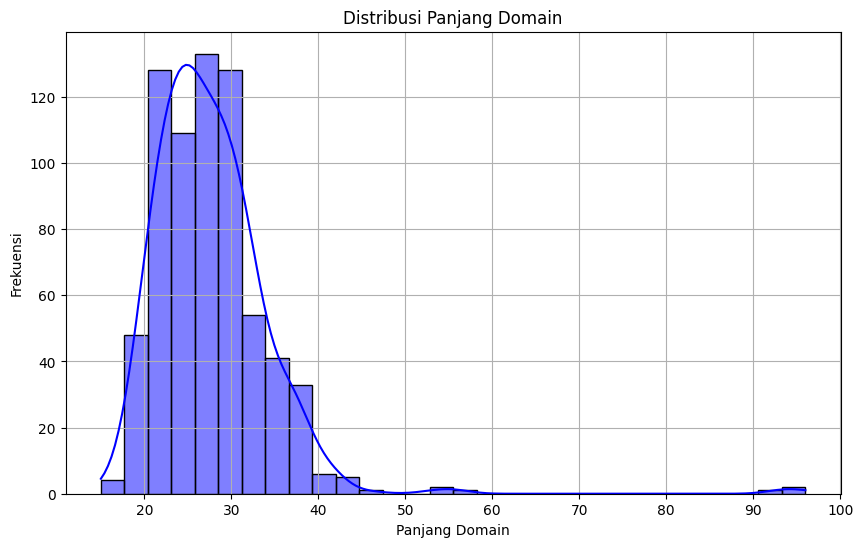

In [57]:
# 4. Visualisasi Distribusi Panjang Domain
plt.figure(figsize=(10, 6))
sns.histplot(data['domain_length'], bins=30, kde=True, color='blue')
plt.title('Distribusi Panjang Domain')
plt.xlabel('Panjang Domain')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

<ipython-input-58-2f37811c7876>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tld_counts.index, y=tld_counts.values, palette="viridis")


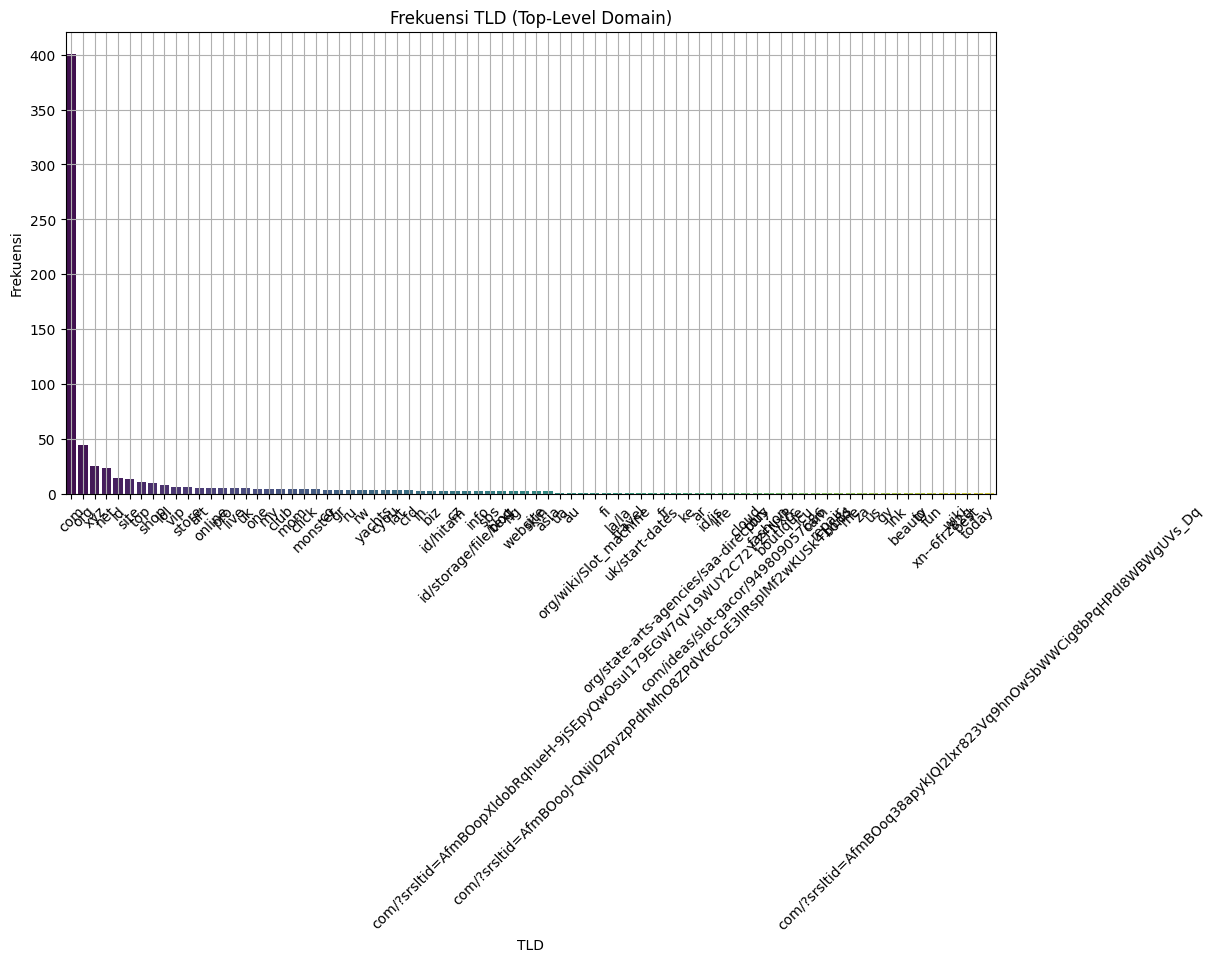

In [58]:
# 5. Analisis Frekuensi TLD (Top-Level Domain)
plt.figure(figsize=(12, 6))
tld_counts = data['tld'].value_counts()
sns.barplot(x=tld_counts.index, y=tld_counts.values, palette="viridis")
plt.title('Frekuensi TLD (Top-Level Domain)')
plt.xlabel('TLD')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.grid()
plt.show()

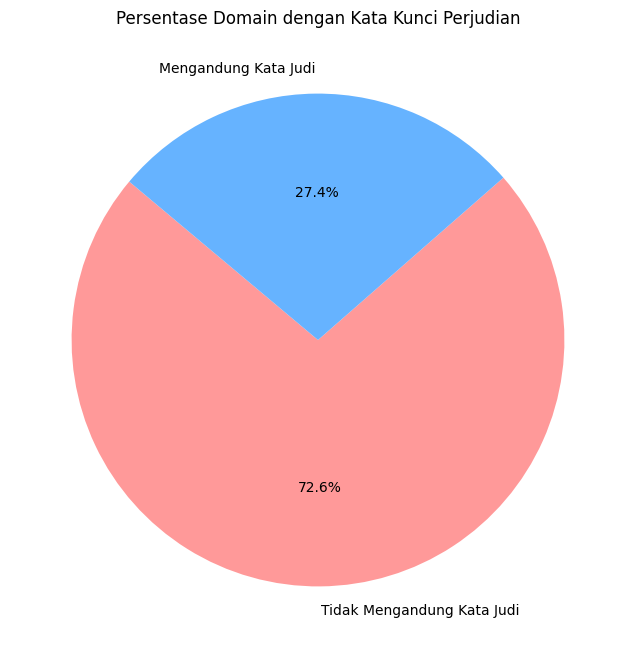

In [59]:
# 6. Frekuensi Domain dengan Kata Kunci Perjudian
gambling_counts = data['gambling_match'].value_counts()
labels = ['Tidak Mengandung Kata Judi', 'Mengandung Kata Judi']
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(8, 8))
plt.pie(gambling_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Persentase Domain dengan Kata Kunci Perjudian')
plt.show()

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
file_path = '/mnt/data/processed_domains.xlsx'
data = pd.read_excel(file_path)

In [62]:
# 2. Persiapan Fitur dan Label
# Asumsikan 'gambling_match' adalah label (1 = Judi, 0 = Non-Judi)
features = ['domain_length', 'digit_count', 'hyphen_count']  # Fitur yang digunakan
X = data[features]  # Fitur
y = data['gambling_match'].astype(int)  # Target label

In [63]:
# 3. Membagi Data ke Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# 4. Melatih Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# 5. Prediksi dan Evaluasi
y_pred = model.predict(X_test)


In [66]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       145
           1       0.71      0.61      0.66        64

    accuracy                           0.80       209
   macro avg       0.77      0.75      0.76       209
weighted avg       0.80      0.80      0.80       209



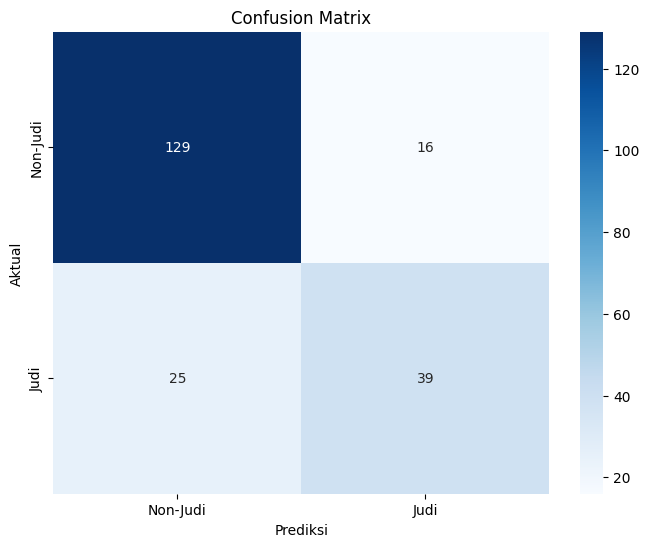

In [67]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Judi', 'Judi'], yticklabels=['Non-Judi', 'Judi'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# 1. Membaca data
file_path = '/mnt/data/processed_domains.xlsx'
data = pd.read_excel(file_path)

In [70]:
# 2. Persiapan fitur dan label
features = ['domain_length', 'digit_count', 'hyphen_count']  # Fitur yang digunakan
X = data[features]
y = data['gambling_match'].astype(int)  # Label (1 = Judi, 0 = Non-Judi)

In [71]:
# 3. Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [72]:
# 4. Membagi data ke dalam set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [73]:
# 5. Melatih model SVM dengan kernel RBF
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [74]:
# 6. Prediksi pada set pengujian
y_pred = svm_model.predict(X_test)


Confusion Matrix:
[[125  20]
 [ 21  43]]


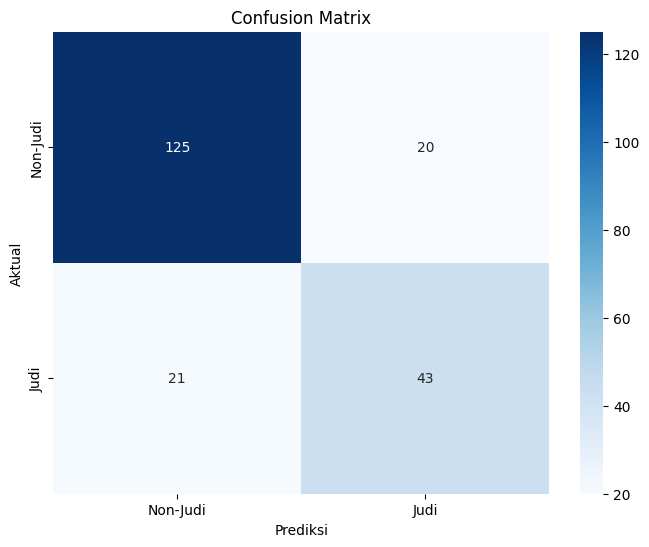


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       145
           1       0.68      0.67      0.68        64

    accuracy                           0.80       209
   macro avg       0.77      0.77      0.77       209
weighted avg       0.80      0.80      0.80       209



In [75]:
# 7. Evaluasi model
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Judi', 'Judi'], yticklabels=['Non-Judi', 'Judi'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 1. Membaca data
file_path = '/mnt/data/processed_domains.xlsx'
data = pd.read_excel(file_path)

# 2. Persiapan fitur dan label
features = ['domain_length', 'digit_count', 'hyphen_count']
X = data[features]
y = data['gambling_match'].astype(int)  # Label (1 = Judi, 0 = Non-Judi)

# 3. Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Membagi data ke dalam set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Melatih model SVM dengan kernel RBF
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# 6. Prediksi pada set pengujian
data['prediction'] = svm_model.predict(X_scaled)

# 7. Menyimpan hasil prediksi ke dalam file baru
output_path = '/mnt/data/svm_gambling_predictions.xlsx'
data.to_excel(output_path, index=False)

print(f"Hasil prediksi disimpan ke {output_path}")


Hasil prediksi disimpan ke /mnt/data/svm_gambling_predictions.xlsx


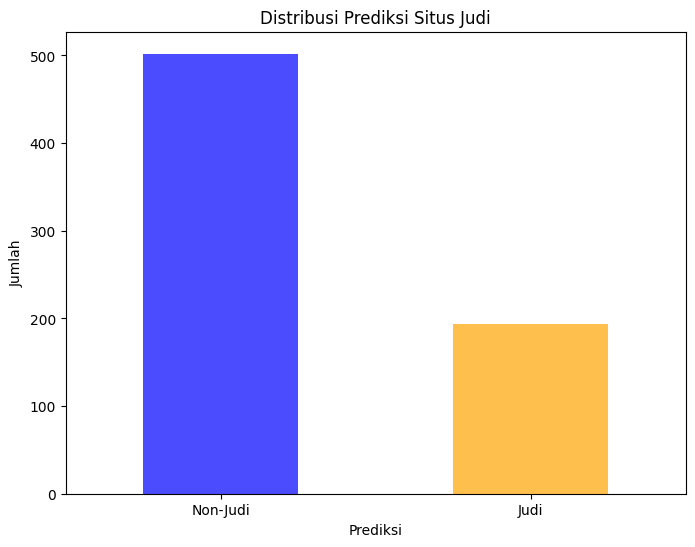

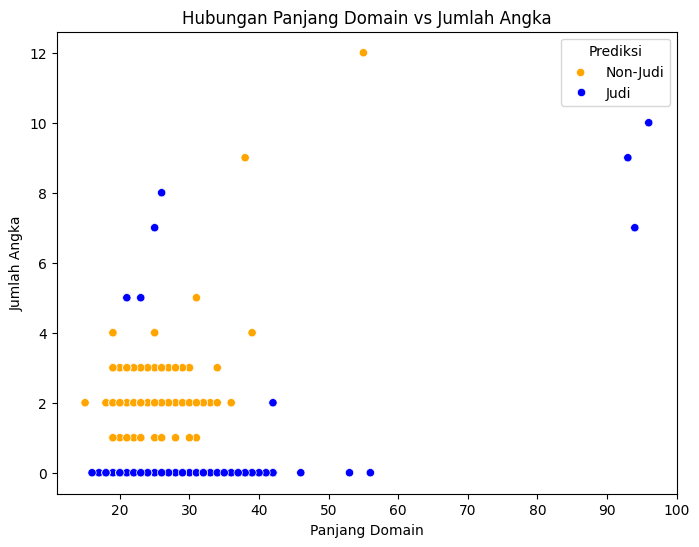

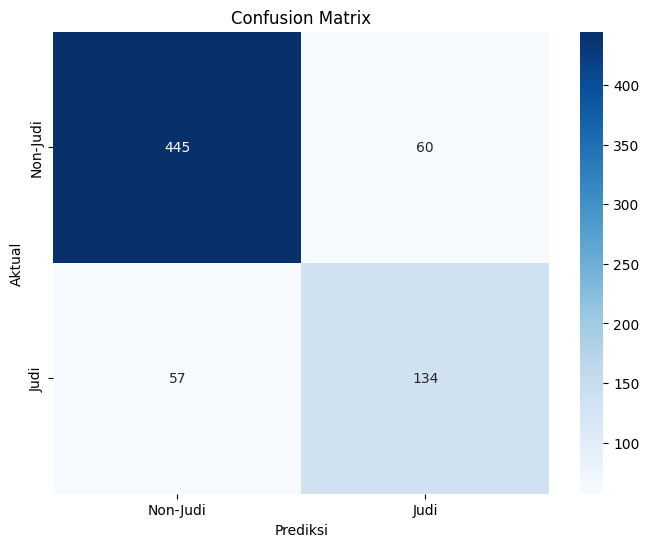

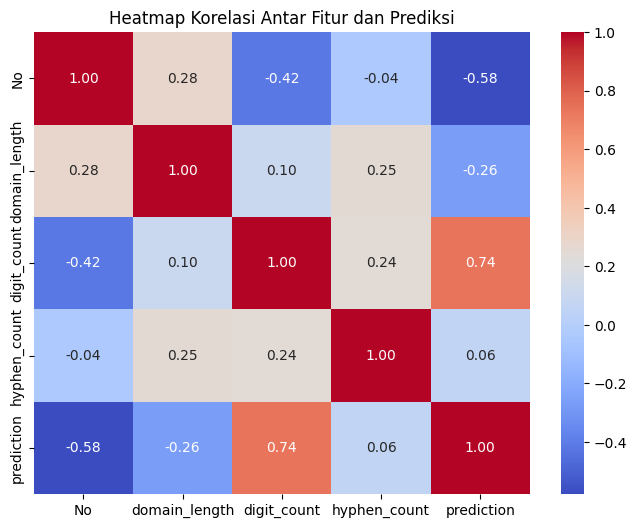

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# 1. Membaca hasil prediksi
file_path = '/mnt/data/svm_gambling_predictions.xlsx'
data = pd.read_excel(file_path)

# 2. Visualisasi Distribusi Prediksi
plt.figure(figsize=(8, 6))
data['prediction'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Distribusi Prediksi Situs Judi')
plt.xticks(ticks=[0, 1], labels=['Non-Judi', 'Judi'], rotation=0)
plt.ylabel('Jumlah')
plt.xlabel('Prediksi')
plt.show()

# 3. Scatter Plot Fitur
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='domain_length',
    y='digit_count',
    hue='prediction',
    data=data,
    palette={0: 'blue', 1: 'orange'}
)
plt.title('Hubungan Panjang Domain vs Jumlah Angka')
plt.xlabel('Panjang Domain')
plt.ylabel('Jumlah Angka')
plt.legend(title='Prediksi', loc='upper right', labels=['Non-Judi', 'Judi'])
plt.show()

# 4. Confusion Matrix (Jika Data Dilabeli)
if 'gambling_match' in data.columns:
    cm = confusion_matrix(data['gambling_match'], data['prediction'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Judi', 'Judi'], yticklabels=['Non-Judi', 'Judi'])
    plt.title('Confusion Matrix')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

# Memilih hanya kolom numerik
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# 5. Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur dan Prediksi')
plt.show()


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 1. Membaca data yang sudah diproses
file_path = '/mnt/data/processed_domains.xlsx'
data = pd.read_excel(file_path)

# 2. Fitur Ekstraksi: Asumsi fitur sudah ada dalam data, misalnya 'domain_length', 'digit_count', dll
# Menyiapkan X (fitur) dan y (target)
X = data[['domain_length', 'digit_count']]  # Fitur yang diambil dari data URL (sesuaikan dengan kolom fitur)
y = data['gambling_match']  # Target yang menandakan apakah situs judi atau bukan

# 3. Pembagian Data: Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Melatih Model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 5. Prediksi pada Data Uji
y_pred = svm_model.predict(X_test)

# 6. Evaluasi Model
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. Menambahkan Hasil Prediksi ke Data
data['prediction'] = svm_model.predict(X)  # Prediksi untuk seluruh dataset
print(data.columns)

# 8. Menyaring hasil sesuai dengan pola dan menyajikan hasil dalam tabel
result = data[['domain', 'prediction']]  # Sesuaikan dengan nama kolom yang benar

# 9. Menyimpan Hasil dalam Excel (Opsional)
result.to_excel('/mnt/data/svm_gambling_predictions2.xlsx', index=False)

# 10. Menampilkan Tabel Hasil
result.head()  # Menampilkan beberapa hasil pertama


Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.88      0.88       145
        True       0.73      0.70      0.71        64

    accuracy                           0.83       209
   macro avg       0.80      0.79      0.80       209
weighted avg       0.83      0.83      0.83       209

Index(['No', 'domain', 'TLD', 'domain_length', 'digit_count', 'hyphen_count',
       'gambling_match', 'tld', 'prediction'],
      dtype='object')


,domain,prediction
0,https://totolotremacau12.com,True
1,https://harta138jp.com,True
2,https://mole4dboss.com,False
3,https://radenhoki.pro,False
4,https://pompa77.mom,True


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('domain').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('prediction').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['prediction'].value_counts()
    for x_label, grp in _df_2.groupby('domain')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('domain')
_ = plt.ylabel('prediction')

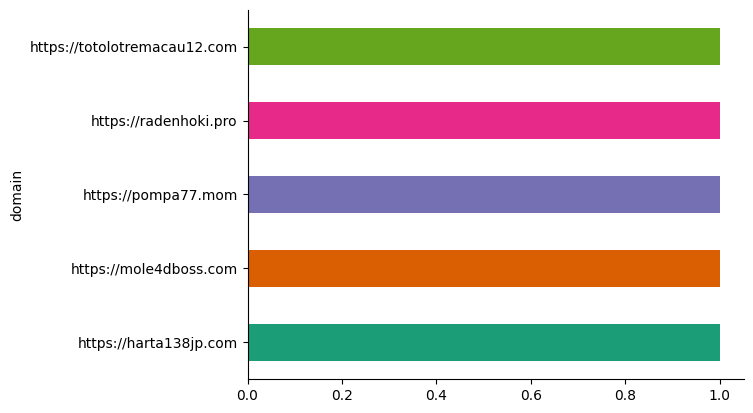

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('domain').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

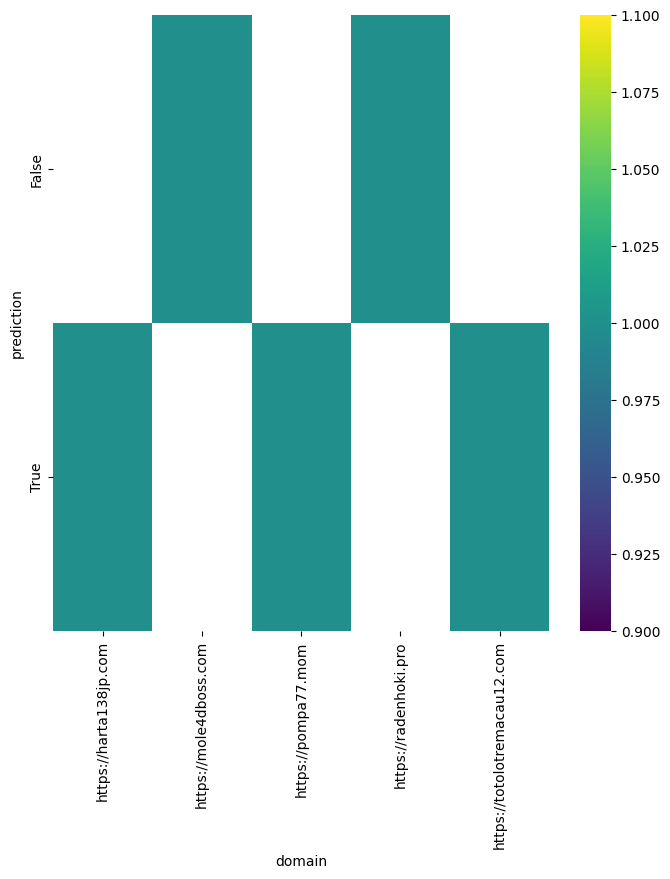

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['prediction'].value_counts()
    for x_label, grp in _df_2.groupby('domain')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('domain')
_ = plt.ylabel('prediction')

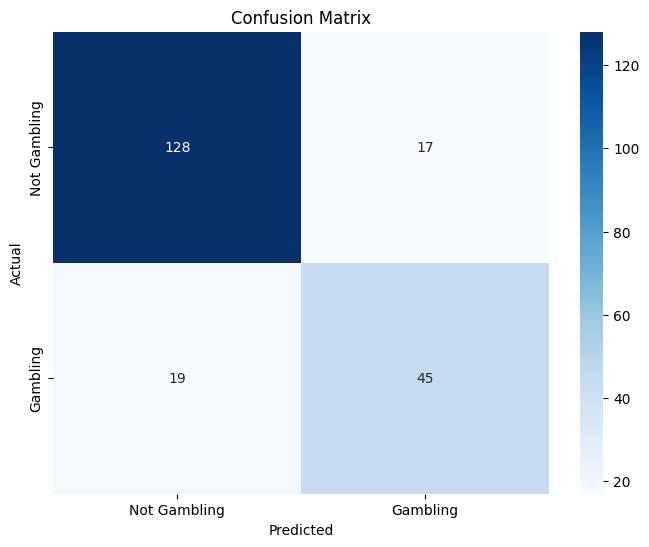

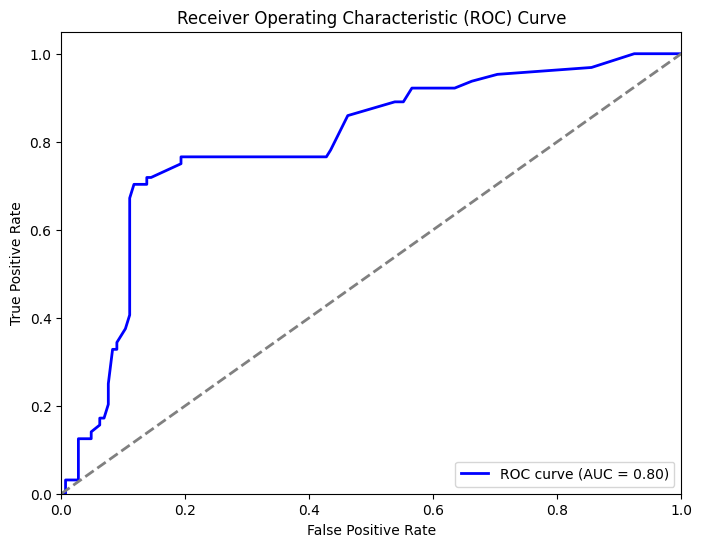

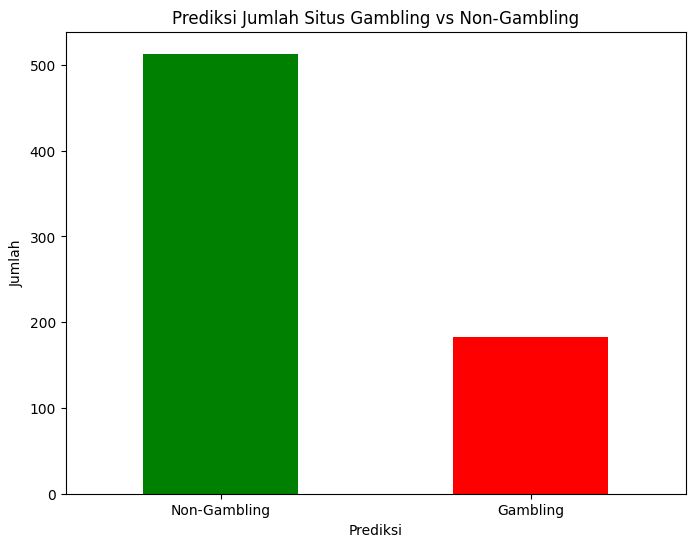

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Gambling', 'Gambling'], yticklabels=['Not Gambling', 'Gambling'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Visualisasi ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 3. Visualisasi Bar Chart Prediksi Gambling vs Non-Gambling
gambling_count = result['prediction'].value_counts()

plt.figure(figsize=(8,6))
gambling_count.plot(kind='bar', color=['green', 'red'])
plt.title('Prediksi Jumlah Situs Gambling vs Non-Gambling')
plt.xlabel('Prediksi')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Non-Gambling', 'Gambling'], rotation=0)
plt.show()


In [83]:
# 4. Menampilkan 10 Data Sample dengan Prediksi 'Gambling' (terindikasi judi)
gambling_sites = result[result['prediction'] == 1].head(100)  # Menampilkan 10 situs yang terindikasi judi
print(gambling_sites)


                            domain  prediction
0     https://totolotremacau12.com        True
1           https://harta138jp.com        True
4              https://pompa77.mom        True
14    https://www.bonusbwbt365.com        True
15           https://bwbt365ok.com        True
..                             ...         ...
168      https://jp.66megawin.life        True
171     https://rajasgptoto88.blog        True
174    https://www.88bigbisnis.one        True
175          https://f32h.short.gy        True
178  https://join-slotairbet88.com        True

[100 rows x 2 columns]


In [84]:
# 5. Menyaring hasil sesuai dengan pola dan menyajikan hasil dalam tabel
# Menyaring hasil yang diprediksi sebagai situs judi (prediction == 1)
gambling_sites = result[result['prediction'] == 1]

# 6. Menyimpan hasil ke Excel untuk pelaporan
output_file_path = '/mnt/data/gambling_sites_report.xlsx'  # Path output file
gambling_sites.to_excel(output_file_path, index=False)

# 7. Menampilkan path file yang telah disimpan untuk diunduh
print(f"Data yang terindikasi situs judi telah disimpan dalam file: {output_file_path}")


Data yang terindikasi situs judi telah disimpan dalam file: /mnt/data/gambling_sites_report.xlsx


In [85]:
# done
# trial hidden pattern
import numpy as np

# Menampilkan koefisien dari model SVM dengan kernel linear
coef = svm_model.coef_

# Menampilkan bobot setiap fitur
feature_importance = np.abs(coef[0])
features = ['domain_length', 'digit_count']

# Menampilkan fitur dan pentingnya
for feature, importance in zip(features, feature_importance):
    print(f"Fitur: {feature}, Pentingnya: {importance}")


Fitur: domain_length, Pentingnya: 4.547473508864641e-13
Fitur: digit_count, Pentingnya: 0.6667672767794954


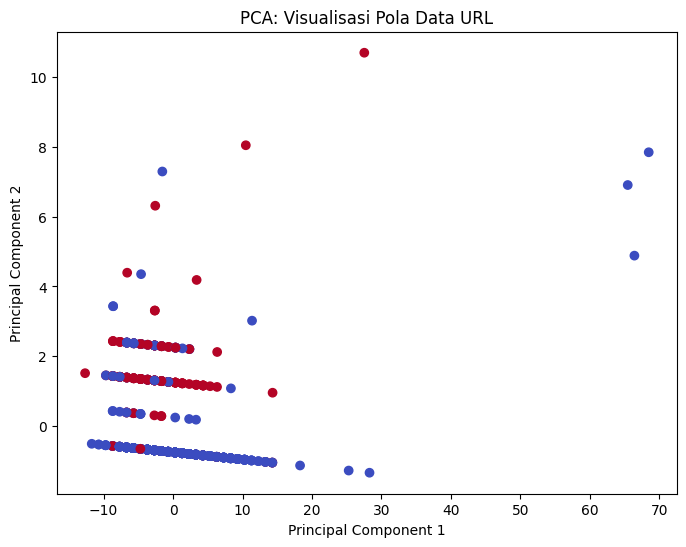

In [86]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Menggunakan PCA untuk mereduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.title('PCA: Visualisasi Pola Data URL')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


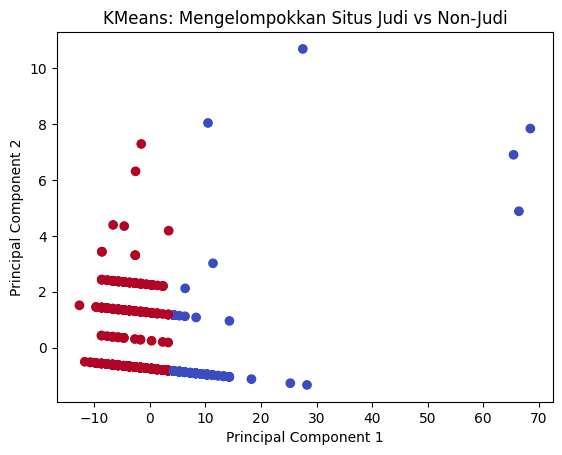

In [87]:
from sklearn.cluster import KMeans

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=2, random_state=42)

# Melatih model
kmeans.fit(X)

# Visualisasi cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='coolwarm')
plt.title('KMeans: Mengelompokkan Situs Judi vs Non-Judi')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
